In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.04G/1.06G [00:04<00:00, 262MB/s]
100% 1.06G/1.06G [00:04<00:00, 231MB/s]


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
#generators
train=keras.utils.image_dataset_from_directory(directory='/content/train', labels='inferred', label_mode='int', batch_size=32,image_size=(256,256))
validation=keras.utils.image_dataset_from_directory(directory='/content/test', labels='inferred', label_mode='int', batch_size=32,image_size=(256,256))


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label): 
    image=tf.cast(image/255.,tf.float32)
    return image,label
train=train.map(process)
validation=validation.map(process)

In [ ]:
# create CNN model
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train,epochs=10,validation_data=validation)

Epoch 1/10
625/625 [==============================] - 60s 85ms/step - loss: 0.6600 - accuracy: 0.6035 - val_loss: 0.6206 - val_accuracy: 0.6732
Epoch 2/10
625/625 [==============================] - 51s 82ms/step - loss: 0.5350 - accuracy: 0.7262 - val_loss: 0.4739 - val_accuracy: 0.7710
Epoch 3/10
625/625 [==============================] - 52s 83ms/step - loss: 0.4174 - accuracy: 0.8058 - val_loss: 0.4869 - val_accuracy: 0.7812
Epoch 4/10
625/625 [==============================] - 52s 83ms/step - loss: 0.2932 - accuracy: 0.8747 - val_loss: 0.6605 - val_accuracy: 0.7804
Epoch 5/10
625/625 [==============================] - 50s 80ms/step - loss: 0.1784 - accuracy: 0.9291 - val_loss: 0.8225 - val_accuracy: 0.7820
Epoch 6/10
625/625 [==============================] - 49s 79ms/step - loss: 0.0933 - accuracy: 0.9660 - val_loss: 1.0742 - val_accuracy: 0.7774
Epoch 7/10
625/625 [==============================] - 49s 78ms/step - loss: 0.0758 - accuracy: 0.9730 - val_loss: 1.2553 - val_accuracy:

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history(['accuracy'],color='red',label='train'))
plt.plot(history.history(['val_score'],color='blue',label='validation'))
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history(['loss'],color='red',label='train'))
plt.plot(history.history(['val_loss'],color='blue',label='validation'))
plt.legend()
plt.show()

# Stopping Overfitting

In [ ]:
# create CNN model
model2=Sequential()

model2.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model2.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model2.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model2.add(Flatten())

model2.add(Dense(128,activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(64,activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(1,activation='sigmoid'))



In [ ]:
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# New Section

In [ ]:
model2.summary()

In [ ]:
model2.fit(train,epochs=10,validation_data=validation)

Epoch 1/10
625/625 [==============================] - 73s 110ms/step - loss: 1.4983 - accuracy: 0.5777 - val_loss: 0.6559 - val_accuracy: 0.6588
Epoch 2/10
625/625 [==============================] - 69s 111ms/step - loss: 0.5739 - accuracy: 0.6992 - val_loss: 0.5123 - val_accuracy: 0.7568
Epoch 3/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4798 - accuracy: 0.7714 - val_loss: 0.4688 - val_accuracy: 0.7822
Epoch 4/10
625/625 [==============================] - 68s 109ms/step - loss: 0.4217 - accuracy: 0.8074 - val_loss: 0.4878 - val_accuracy: 0.7634
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3716 - accuracy: 0.8386 - val_loss: 0.5484 - val_accuracy: 0.7570
Epoch 6/10
625/625 [==============================] - 65s 104ms/step - loss: 0.2984 - accuracy: 0.8706 - val_loss: 0.4251 - val_accuracy: 0.8112
Epoch 7/10
625/625 [==============================] - 65s 104ms/step - loss: 0.2327 - accuracy: 0.9013 - val_loss: 0.6089 - val_ac

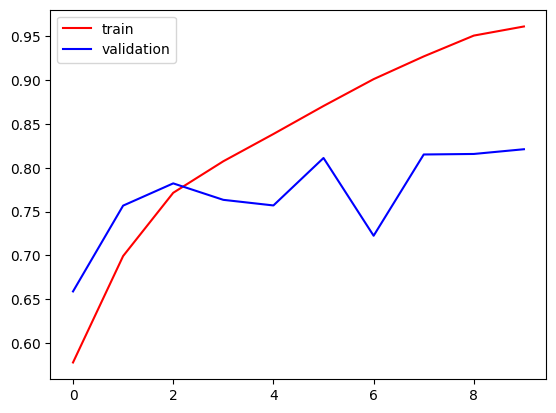

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history(['accuracy'],color='red',label='train'))
plt.plot(history.history(['val_score'],color='blue',label='validation'))
plt.legend()
plt.show()

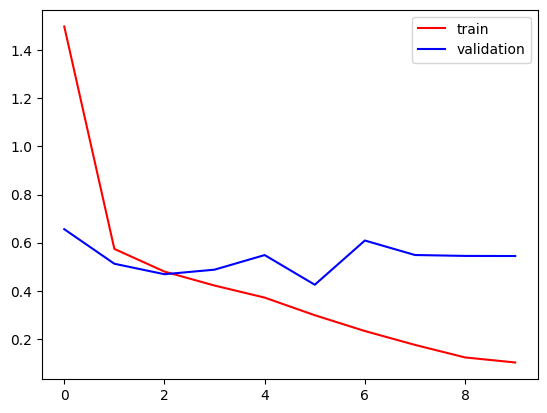

In [ ]:
plt.plot(history.history(['loss'],color='red',label='train'))
plt.plot(history.history(['val_loss'],color='blue',label='validation'))
plt.legend()
plt.show()